# APS106 Design Problem - Stocks revisted with pandas

Last week, we looked at analyzing financial stock data with objects. Today, we're going to revisit stock data and computing returns on investment (ROI), but instead of creating classes and objects to analyze the data, we're going to use the `pandas` library.


## Part 1 - Read stock price data from csv file

### Define the problem
In the first part of our problem, we want to read historical stock price data from a file and store it within a `pandas` **DataFrame** object.
We have a number of `.csv` files containing data from different companies. All the files are named "*company*_stock_data.csv" where *company* is the name of the company. 
We want to read the data from all of these files and store them within a single **DataFrame**.

### Define test cases
We can use our set of files as a testcase. Some things that we will want to consider when determining if our solution is correct:
* Does the DataFrame contain the columns we expect?
* Does the DataFrame contain all the dates and price information from each file?
* Is there any useful information missing from our DataFrame?

### Generate solutions
Based on the problem definition, here are some things that our program will need to do:
* Create a DataFrame object to hold all of the data
* Load the contents of a csv file into a DataFrame
* Concatenate the data from each file into our DataFrame

An algorithm plan could be:
1. Create an empty DataFrame, `stock_df`
2. Use a for loop to iterate over each company name
    * Use string concatenation to define the filename for that company
    * Load the file contents into a DataFrame, `company_df`
    * Concatenate the file data `company_df` to `stock_df` 

In [1]:
# just in case, make sure pandas is installed
!pip install pandas

In [43]:
# pt 1 - open files concatenate them into a single dataframe
import pandas as pd

companies = ['apple', 'gamestop', 'netflix', 'td_bank', 'tesla']

stock_df = pd.DataFrame() # create an empty dataframe that we will add to

for company in companies:
    filename = company + '_stock_data.csv'

    # read file and add it to our dataframe
    file_df = pd.read_csv(filename)

    # add a column to the dataframe to store the name of the company
    file_df['Company'] = company

    # concatenate the file dataframe to our full DataFrame
    stock_df = pd.concat([stock_df, file_df], ignore_index=True)

print(stock_df.head())


         Date Close/Last    Volume     Open     High        Low Company
0  04/03/2024    $169.65  47691720  $168.79  $170.68    $168.58   apple
1  04/02/2024    $168.84  49329480  $169.08  $169.34  $168.2302   apple
2  04/01/2024    $170.03  46240500  $171.19  $171.25   $169.475   apple
3  03/28/2024    $171.48  65672690  $171.75  $172.23    $170.51   apple
4  03/27/2024    $173.31  60273270  $170.41  $173.60    $170.11   apple


Looks like it worked, but let's return to our testcases to be sure:
* Does the DataFrame contain the columns we expect?
* Does the DataFrame contain all the dates and price information from each file?
* **Is there any useful information missing from our DataFrame?**

Let's modify our code to add a **column** called **Company** to the DataFrame that specfies the company. 

## Remove dollar signs and convert dollar amounts from strings to floats
In the next part of this problem, we're going to do some analysis of the stock prices. Before we can do that, we'll need to convert the dollar values in our DataFrame from strings to floats. The dollar amounts are currently stored as strings included a '$' symbol. The code below will remove those dollar signs and convert the values from strings to floats. **We haven't talked about `replace` and `astype` in APS106, so don't worry if you're a bit confused by the code below. These methods are beyond the scope of APS106.**

In [44]:
# remove the dollar sign from the 'Close' column and convert it to a float
stock_df = stock_df.replace('[\$]', value='', regex=True)
stock_df.loc[:,['Close/Last', 'Open', 'High', 'Low']] = stock_df.loc[:, ['Close/Last', 'Open', 'High', 'Low']].astype(float)
# format and sort by date
stock_df.loc[:,'Date'] = pd.to_datetime(stock_df['Date']).dt.strftime("%Y-%m-%d")
stock_df.sort_values(by='Date', inplace=True)
stock_df = stock_df.reset_index(drop=True)
print(stock_df.head())

         Date Close/Last     Volume     Open      High      Low   Company
0  2023-04-04     192.58  126463800   197.32  198.7446   190.32     tesla
1  2023-04-04      22.35    3421464    22.75     23.14  22.0901  gamestop
2  2023-04-04     346.75    3298072   348.49     349.8   343.95   netflix
3  2023-04-04     165.63   46278300  166.595    166.84   165.11     apple
4  2023-04-04      60.54    2677729    61.82     62.12    60.37   td_bank


## Part 2 - Analyze the stock price for a specific company

### Define the problem
Now let's use our `stock_df` DataFrame to analyze the stock prices of individual companies.
Specifically, we will:
1. Extract the price of a stock at a specific date.
2. Compute the price change of a stock between two dates.
3. Compute the mean "Close/Last" price of a company.
4. Plot the "Close/Last" price of a company vs. the date.

### Generate solutions
1. Filter the `stock_df` DataFrame to generate a new DataFrame with only data from the company we want to analyze
2. Index the dataframe using the date to get the prices at specific dates
3. Use the `mean` method to compute the mean of the "Close/Last" column
4. Use the `plot` method to plot values of the "Close/Last" column vs. the "Date" column


          Date Close/Last   Volume    Open    High     Low  Company
2   2023-04-04     346.75  3298072  348.49   349.8  343.95  netflix
5   2023-04-05     342.35  4205545   345.3  345.43  336.25  netflix
10  2023-04-06     339.33  4660542  339.34  340.48  332.63  netflix
17  2023-04-10     338.99  2657898  335.27  339.88  333.36  netflix
20  2023-04-11     338.21  4044778  343.45  347.14  337.64  netflix
The value of company  netflix  on  2023-04-05  is $ 342.35
Price change:  287.73
The average stock price for netflix is 449.99


<Axes: title={'center': 'netflix stock price over time'}, xlabel='Date'>

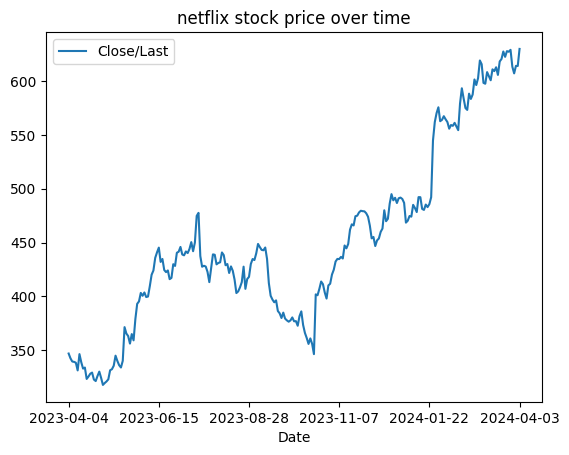

In [45]:
# pt 2 - compute the average stock price a specific company
company = 'netflix'

## BREAKOUT 2
# filter the dataframe to only include the company we are interested in
company_df = stock_df.loc[stock_df['Company'] == company, :]
print(company_df.head())

# index the dataframe to get the prices at specific dates
date1 = "2023-04-05"
date2 = "2024-04-03"
price1 = company_df.loc[company_df['Date']==date1, 'Close/Last'].values[0]
print("The value of company ", company, " on ", date1, " is $", price1)

# get the second date and compute the price change
price2 = company_df.loc[company_df["Date"]==date2, 'Close/Last'].values[0]
price_change = round(price2 - price1, 2)
print("Price change: ", price_change)

# compute the average stock price
avg_stock_price = company_df.loc[:, 'Close/Last'].mean()
avg_stock_price = round(avg_stock_price, 2)
print("The average stock price for", company, "is", avg_stock_price)

# plot the stock price over time
company_df.plot(x='Date', y='Close/Last', title=company + ' stock price over time')

## Part 3 - Compute ROI
Now let's write a function that uses a DataFrame to compute a hypothetical return on investment (ROI) for a group of stocks. Remember from last week, that ROI is calculated as:
$$ROI = {current\:value - initial\:cost \over initial\:cost} * 100\%$$

### Define the problem
Imagine that you purchased stocks from a few companies at some date in the past. Now you want to check how your investment is doing by calculating the ROI of your combined stocks. To compute your ROI, you need to calculate the initial cost of purchasing the stocks and their current value. The initial cost is the sum of the stock prices for the companies you purchased on the purchase date. The current value is the sum of stock prices for these companies on the current date.

Write a function called `compute_ROI` that has the following parameters:
* `df` - A dataframe object that has the same columns as the `stock_df` DataFrame
* `companies` - A list of strings defining the company stocks that were purchased
* `purchase_date` - A string defining the purchase date of the stocks
* `current_date` - A sting defining the current date

The function should return the total initial price, the total current value, and the ROI (as a percentage). All returned values should be rounded to 2 decimal places.

### Define test cases
To test our function, let's imagine we purchased Apple and TD Bank stocks on 2023-04-05 and we want to compute our ROI on 2024-04-03. On the purchase date, the stock prices of Apple and TD Bank were \\$163.76 and \\$58.98, respectively. On the current date, the prices are \\$169.65 and \\$59.61.
$$initial\:cost = \$163.76 + \$58.98 = \$222.74$$
$$current\:value = \$169.65 + \$59.61 = \$229.26$$
$$ROI = {\$229.26 - \$222.74 \over \$222.74} \approx 0.0293 = 2.93\%$$

### Generate Solutions
1. Initialize variables `total_purchase_price = 0` and `total_current_value = 0`; these will be used to accumulate the sum of the prices for each stock on the purchase and current dates
2. Iterate through the companies: For `company` in `companies`
    * use `loc` to extract the rows from the DataFrame where the company column is equal to `company` and the date column is equal to `purchase_date`
    * use `values` to extract the numerical value from the Close/Last column
    * Add the values to the `total_purchase_price`
    * Repeat the above with `current_date` and `total_current_value`
3. Compute the ROI
4. Round the values to 2 decimal places

In [46]:
def compute_ROI(df, companies, purchase_date, current_date):
    '''
    (DataFrame, list of str, str, str) -> float, float, float

    Computes the ROI for a group of company stocks between 
    two dates. Returns the total purchase cost, current value,
    and ROI.
    '''
    # BREAKOUT 3
    total_purchase_price = 0
    total_current_value = 0

    for company in companies:
        total_purchase_price += df.loc[(df.loc[:, 'Company']==company) & (df.loc[:, 'Date']==purchase_date), 'Close/Last'].values[0]
        total_current_value += df.loc[(df.loc[:, 'Company']==company) & (df.loc[:, 'Date']==current_date), 'Close/Last'].values[0]

    roi = (total_current_value - total_purchase_price) / total_purchase_price * 100

    # round the values
    total_current_value = round(total_current_value, 2)
    total_purchase_price = round(total_purchase_price, 2)
    roi = round(roi, 2)
    
    return total_purchase_price, total_current_value, roi

In [47]:
companies = ['apple', 'td_bank']
purchase_date = '2023-04-05'
current_date = '2024-04-03'
init_investment, current_value, ROI = compute_ROI(stock_df, companies, purchase_date, current_date)
print("The initial investment was", init_investment, "and the current value is", current_value, "with a ROI of", ROI, "percent")

The initial investment was 222.74 and the current value is 229.26 with a ROI of 2.93 percent
